<a href="https://colab.research.google.com/github/pranauww/Tensorflow/blob/main/CustomerReviewClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
alexa_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/amazon_alexa.tsv', sep = '\t')

In [4]:
alexa_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [5]:
alexa_df.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
alexa_df.tail(10)

,rating,date,variation,verified_reviews,feedback
3140,4,30-Jul-18,White Dot,Barry,1
3141,3,30-Jul-18,Black Dot,,1
3142,4,30-Jul-18,White Dot,My three year old loves it. Good for doing ba...,1
3143,5,30-Jul-18,Black Dot,Awesome device wish I bought one ages ago.,1
3144,5,30-Jul-18,Black Dot,love it,1
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [7]:
alexa_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [8]:
positive = alexa_df[ alexa_df['feedback'] == 1 ]

In [9]:
positive

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [10]:
negative = alexa_df[ alexa_df['feedback'] == 0 ]

In [11]:
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


<Axes: xlabel='feedback', ylabel='count'>

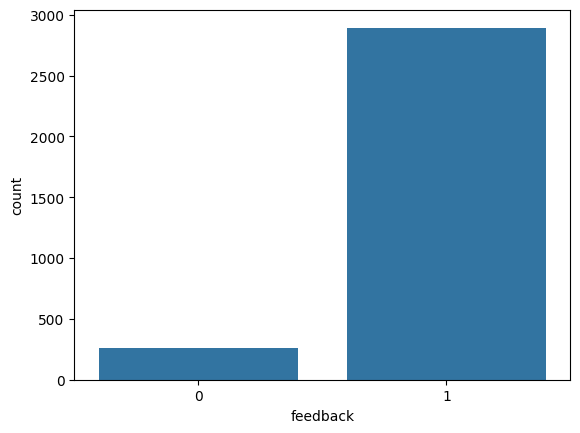

In [18]:
sns.countplot(x = 'feedback', data = alexa_df)

<Axes: xlabel='rating', ylabel='count'>

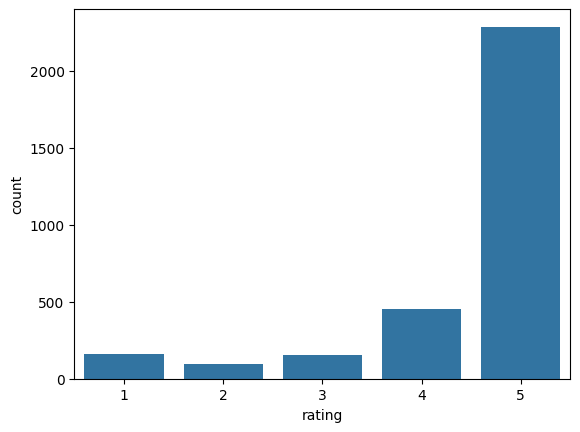

In [19]:
sns.countplot(x = 'rating', data = alexa_df)

<Axes: >

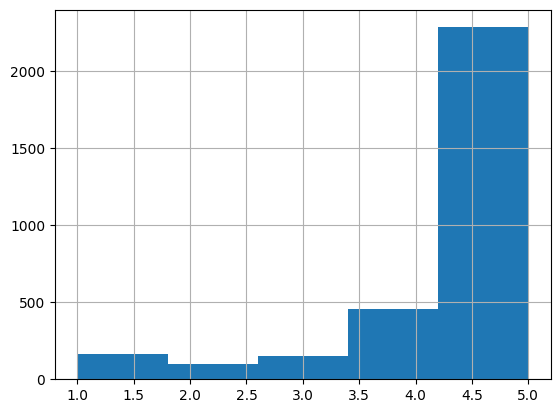

In [20]:
alexa_df['rating'].hist(bins=5)

<ipython-input-21-fab62f9116a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'variation', y = 'rating', data = alexa_df, palette = 'deep')


<Axes: xlabel='variation', ylabel='rating'>

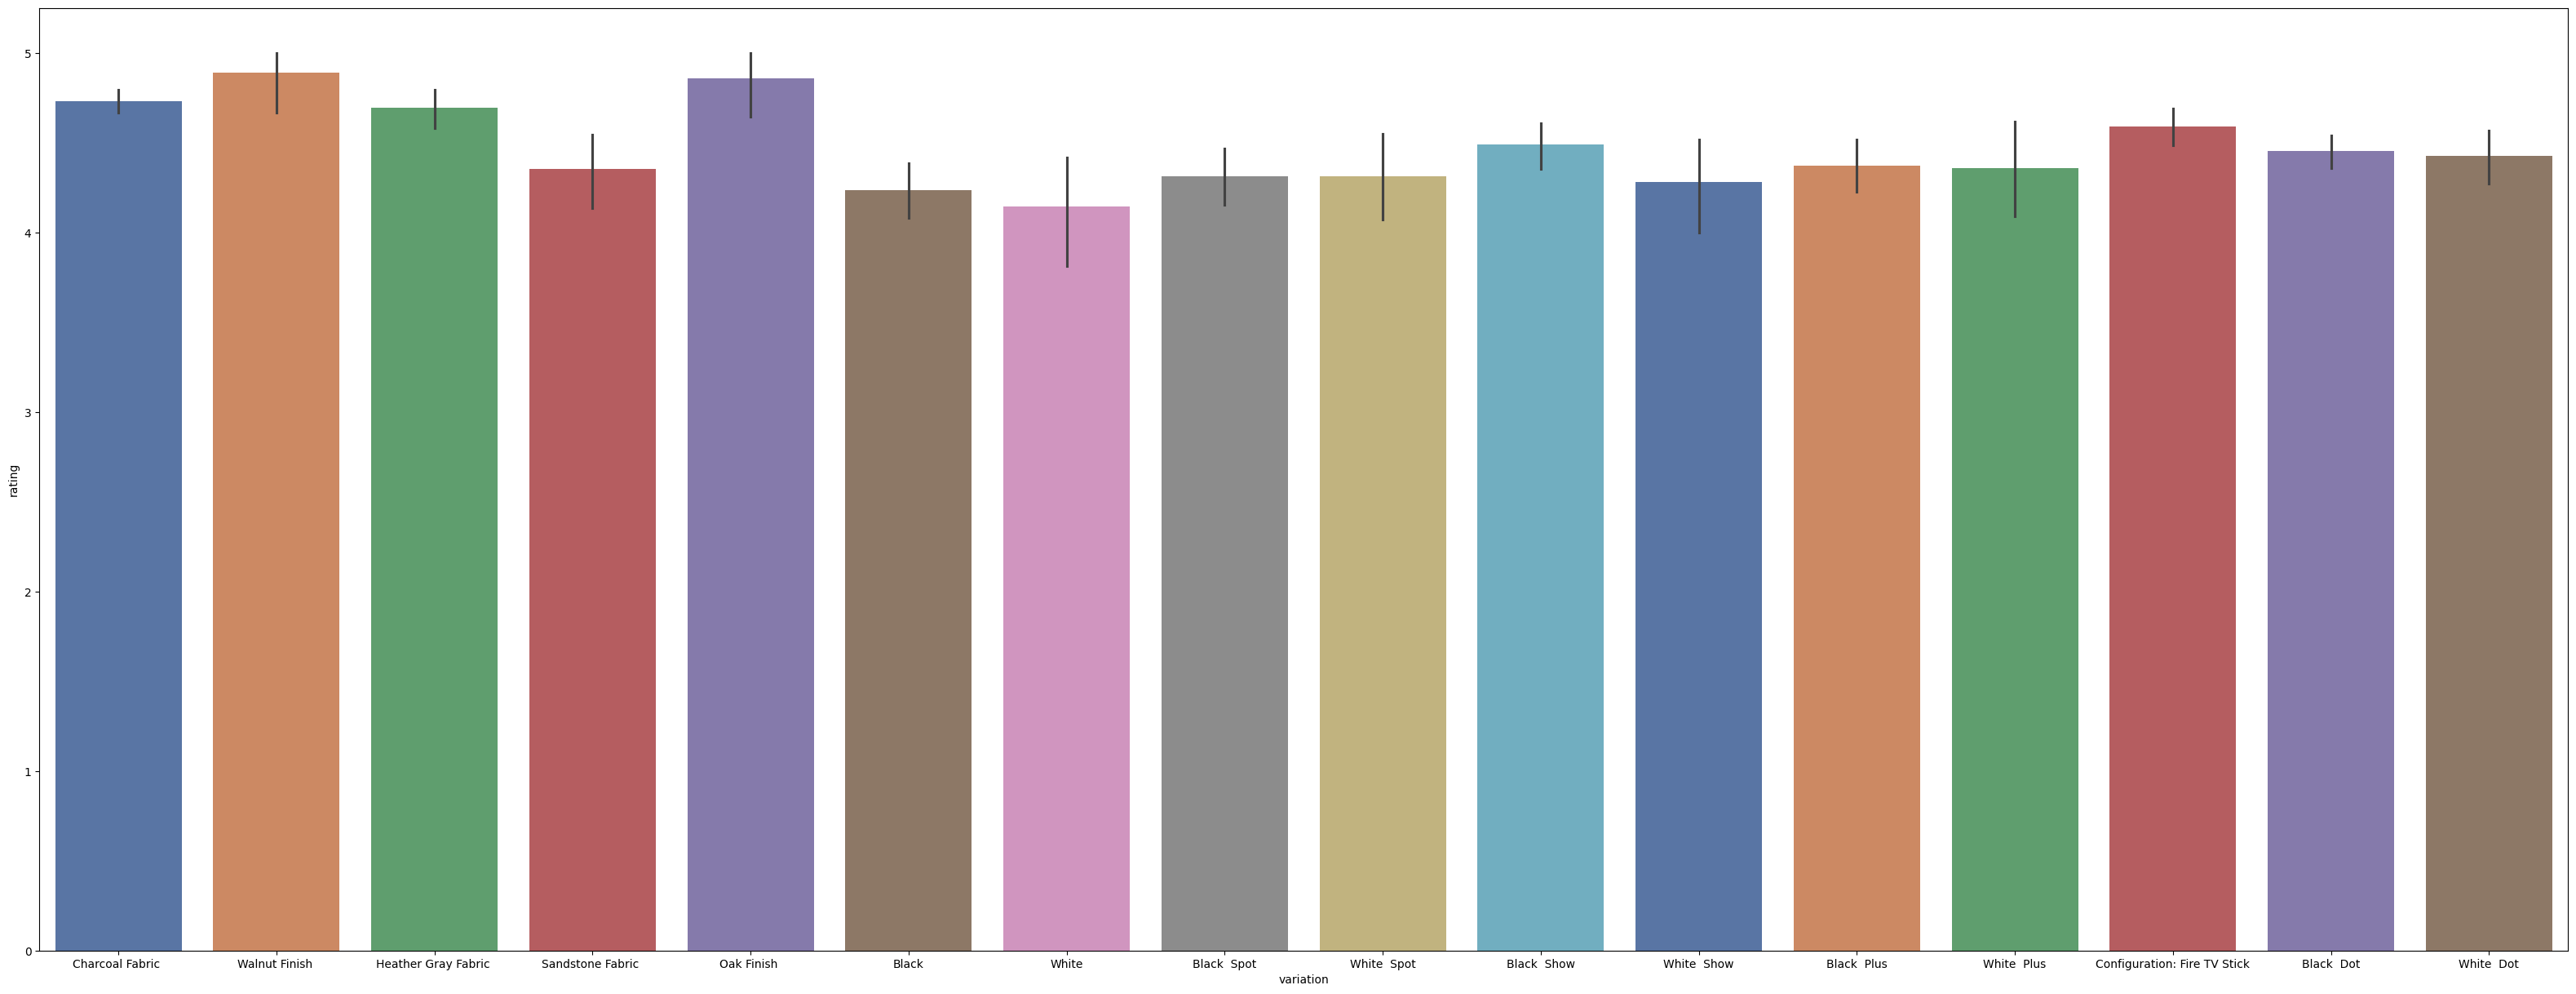

In [21]:
plt.figure(figsize = (40, 15))
sns.barplot(x = 'variation', y = 'rating', data = alexa_df, palette = 'deep')

In [22]:
alexa_df = alexa_df.drop(['date', 'rating'], axis = 1)

In [23]:
alexa_df

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [24]:
variation_dummies = pd.get_dummies(alexa_df['variation'], drop_first = True)

In [25]:
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [26]:
alexa_df.drop(['variation'], axis = 1, inplace = True)

In [27]:
alexa_df

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1


In [28]:
alexa_df = pd.concat([alexa_df, variation_dummies], axis = 1)

In [29]:
alexa_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
vectorizer = CountVectorizer()
alexa_countvect = vectorizer.fit_transform(alexa_df['verified_reviews'])

In [39]:
alexa_countvect.shape

(3150, 4044)

In [40]:
print(vectorizer.get_feature_names_out())

['00' '000' '07' ... 'zzzz' 'zzzzzzz' 'útil']


In [42]:
print(alexa_countvect.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [43]:
alexa_df.drop(['verified_reviews'], axis = 1, inplace = True)

In [44]:
reviews = pd.DataFrame(alexa_countvect.toarray())

In [45]:
alexa_df = pd.concat([alexa_df, reviews], axis = 1)

In [46]:
alexa_df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
X = alexa_df.drop(['feedback'], axis = 1)

In [48]:
X

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
Y = alexa_df['feedback']

In [50]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [51]:
X.shape

(3150, 4059)

In [52]:
Y.shape

(3150,)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

In [54]:
X_train.shape

(2520, 4059)

In [55]:
X_test.shape

(630, 4059)

In [58]:
ANN_classifier = tf.keras.models.Sequential()
ANN_classifier.add(tf.keras.layers.Dense(units = 400, activation = 'relu', input_shape = (4059,)))
ANN_classifier.add(tf.keras.layers.Dense(units = 400, activation = 'relu'))
ANN_classifier.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [59]:
ANN_classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 400)               1624000   
                                                                 
 dense_4 (Dense)             (None, 400)               160400    
                                                                 
 dense_5 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1784801 (6.81 MB)
Trainable params: 1784801 (6.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
ANN_classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [61]:
epochs_hist = ANN_classifier.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
79/79 [==============================] - 8s 54ms/step - loss: 0.2609 - accuracy: 0.9179
Epoch 2/10
79/79 [==============================] - 4s 49ms/step - loss: 0.0836 - accuracy: 0.9694
Epoch 3/10
79/79 [==============================] - 4s 53ms/step - loss: 0.0305 - accuracy: 0.9889
Epoch 4/10
79/79 [==============================] - 5s 61ms/step - loss: 0.0210 - accuracy: 0.9925
Epoch 5/10
79/79 [==============================] - 4s 48ms/step - loss: 0.0171 - accuracy: 0.9933
Epoch 6/10
79/79 [==============================] - 4s 48ms/step - loss: 0.0174 - accuracy: 0.9929
Epoch 7/10
79/79 [==============================] - 4s 55ms/step - loss: 0.0153 - accuracy: 0.9933
Epoch 8/10
79/79 [==============================] - 5s 60ms/step - loss: 0.0151 - accuracy: 0.9933
Epoch 9/10
79/79 [==============================] - 4s 50ms/step - loss: 0.0148 - accuracy: 0.9933
Epoch 10/10
79/79 [==============================] - 4s 47ms/step - loss: 0.0137 - accuracy: 0.9940


In [62]:
Y_predict_train = ANN_classifier.predict(X_train)
Y_predict_train

79/79 [==============================] - 1s 13ms/step


array([[0.9997212 ],
       [0.9999999 ],
       [0.99997395],
       ...,
       [0.9999597 ],
       [0.9999997 ],
       [0.99990016]], dtype=float32)

In [63]:
Y_predict_train = (Y_predict_train > 0.5)

In [64]:
Y_predict_train

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

<Axes: >

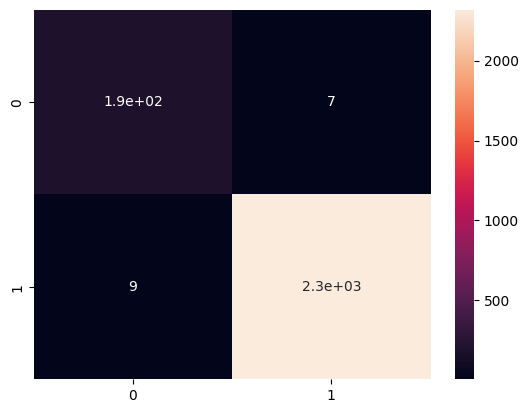

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train, Y_predict_train)
sns.heatmap(cm, annot = True)

20/20 [==============================] - 0s 11ms/step


<Axes: >

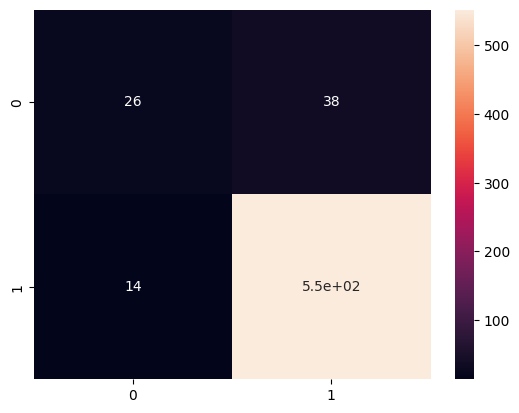

In [66]:
Y_predict_test = ANN_classifier.predict(X_test)
Y_predict_test

Y_predict_test = (Y_predict_test > 0.5)

cm = confusion_matrix(Y_test, Y_predict_test)
sns.heatmap(cm, annot = True)

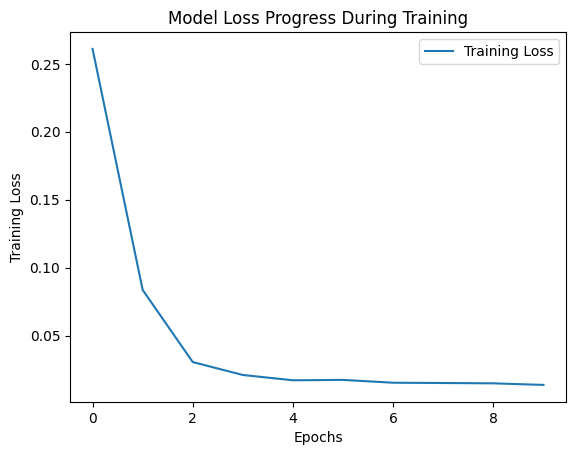

In [67]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

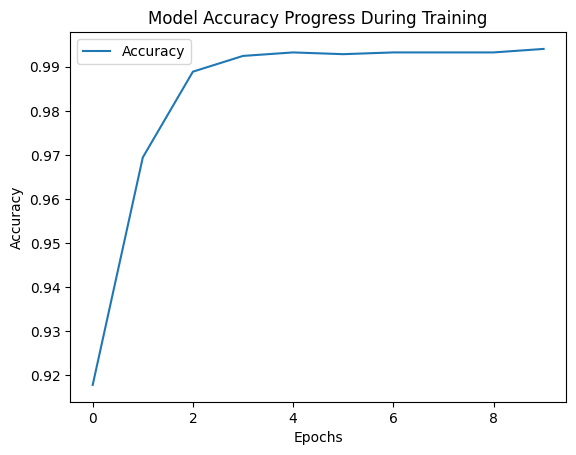

In [68]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy'])